# Create and Save Text Embeddings

This notebook creates a simple set of word embeddings and saves them to a JSON file.

In [1]:
import json
import random
import numpy as np

In [7]:
# Load words from the text file
with open('words.txt', 'r') as file:
    words = [line.strip() for line in file if line.strip()]

print(f"Loaded {len(words)} words from words.txt")

# Display the first 10 words as a sample
print("Sample words:")
print(words[:10])

# Create embeddings
embeddings = []
for word in words:
    embedding = {
        "label": word,
        "x": round(np.random.uniform(-0.5, 0.5), 2),
        "y": round(np.random.uniform(-0.5, 0.5), 2),
        "z": round(np.random.uniform(-0.5, 0.5), 2)
    }
    embeddings.append(embedding)

print(f"Created {len(embeddings)} embeddings")

Loaded 267 words from words.txt
Sample words:
['love', 'hate', 'happy', 'sad', 'angry', 'calm', 'good', 'bad', 'big', 'small']
Created 267 embeddings


## Create sample word embeddings

We'll create 3D embeddings for a set of words.

In [2]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Sample words
words = [
    "love", "hate", "happy", "sad", "angry", "calm", 
    "good", "bad", "big", "small", "hot", "cold",
    "fast", "slow", "high", "low", "rich", "poor",
    "strong", "weak", "beautiful", "ugly", "smart", "dumb"
]

# Create embeddings
embeddings = []
for word in words:
    embedding = {
        "label": word,
        "x": round(np.random.uniform(-0.5, 0.5), 2),
        "y": round(np.random.uniform(-0.5, 0.5), 2),
        "z": round(np.random.uniform(-0.5, 0.5), 2)
    }
    embeddings.append(embedding)

## View the embeddings

In [3]:
# Display the first 5 embeddings
import pprint
pp = pprint.PrettyPrinter(indent=1)
print("First 5 embeddings:")
pp.pprint(embeddings[:5])

First 5 embeddings:
[{'label': 'love', 'x': -0.13, 'y': 0.45, 'z': 0.23},
 {'label': 'hate', 'x': 0.1, 'y': -0.34, 'z': -0.34},
 {'label': 'happy', 'x': -0.44, 'y': 0.37, 'z': 0.1},
 {'label': 'sad', 'x': 0.21, 'y': -0.48, 'z': 0.47},
 {'label': 'angry', 'x': 0.33, 'y': -0.29, 'z': -0.32}]


## Save embeddings to JSON file

In [9]:
# Save to JSON file
with open('embedding.json', 'w') as f:
    json.dump(embeddings, f, indent=2)

print("Embeddings saved to embedding.json")

Embeddings saved to embedding.json


## Verify the saved file

In [5]:
# Read the file back to verify
with open('embedding.json', 'r') as f:
    file_content = f.read()
    
print(f"File contents (first 300 characters):\n{file_content[:300]}")

File contents (first 300 characters):
[
  {
    "label": "love",
    "x": -0.13,
    "y": 0.45,
    "z": 0.23
  },
  {
    "label": "hate",
    "x": 0.1,
    "y": -0.34,
    "z": -0.34
  },
  {
    "label": "happy",
    "x": -0.44,
    "y": 0.37,
    "z": 0.1
  },
  {
    "label": "sad",
    "x": 0.21,
    "y": -0.48,
    "z": 0.47
  },


## Bonus: Visualize the embeddings in 3D

If you have matplotlib installed, you can visualize the embeddings in 3D.

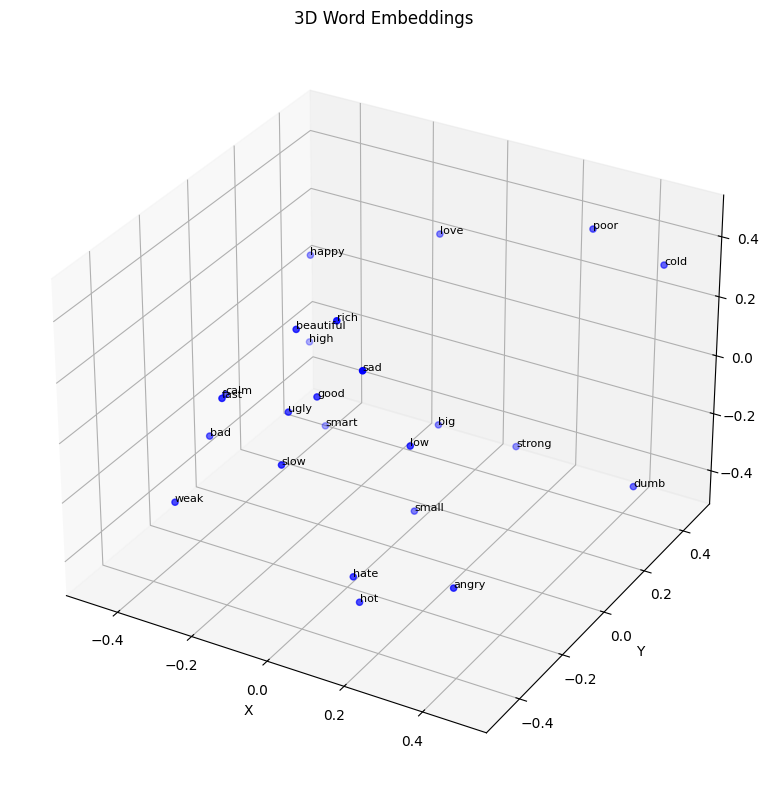

In [6]:
try:
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Extract coordinates
    labels = [e['label'] for e in embeddings]
    x_coords = [e['x'] for e in embeddings]
    y_coords = [e['y'] for e in embeddings]
    z_coords = [e['z'] for e in embeddings]
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot points
    ax.scatter(x_coords, y_coords, z_coords, c='blue', marker='o')
    
    # Add labels
    for label, x, y, z in zip(labels, x_coords, y_coords, z_coords):
        ax.text(x, y, z, label, size=8)
    
    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Word Embeddings')
    
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Matplotlib not installed. Skipping visualization.")